# Using Ls_utils

This notebook shows how some of the basic functionality of Mars Clock works and how it can be used. The methodolgy is based on this publication - https://www.lpl.arizona.edu/~shane/publications/piqueux_etal_icarus_2015.pdf.

In [2]:
# Be sure to use the virtual environment you created to make the package.
# See https://janakiev.com/blog/jupyter-virtual-envs/.

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from astropy import units as u
from astropy.time import Time
from mars_clock.Ls_utils import *

In [7]:
# Landing date/time of Perseverance
ts = Time('2021-02-18 20:55', scale='utc')
float_JD_ts = convert_to_float_delta_J2000(ts) # convert to JD - J2000
assert(np.isclose(float_JD_ts, 7719.371527777985))

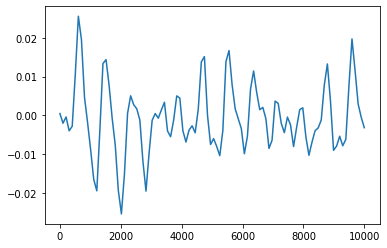

In [8]:
# Show planetary perturbation calculation
times = np.linspace(0., 10000, 100) # meant to be JD - J2000
plt.plot(times, calc_PPS(times))

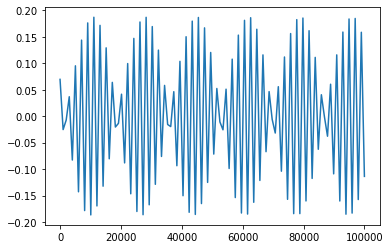

In [9]:
# Show equation of center calculation
times = np.linspace(0., 100000, 100) # meant to be JD - J2000
plt.plot(times, calc_equation_of_center(times))

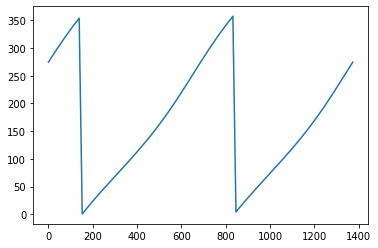

In [10]:
# Calculate Ls over two Martian years
times = np.linspace(0., 2.*mars_tropical_year.to('day').value, 100)
plt.plot(times, calc_Ls(times))

0.006176610190550491


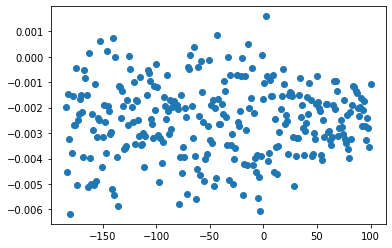

In [13]:
# Testing dates from Picqueux+ (2015) to check for Ls = 0
data = np.genfromtxt("Picqueux2015_Table1.csv", delimiter=',', names=True)
dates_delta_J2000 = data["delta_J2000"]
MYs = data["Mars_year"]

calculated_Ls = calc_Ls(dates_delta_J2000)
# Need to wrap around 360 degrees
ind = calculated_Ls > 350.
calculated_Ls[ind] -= 360.

print(np.max(np.abs(calculated_Ls)))

plt.scatter(MYs, calculated_Ls)

In [15]:
# Check convert_to_float_delta_J2000
test_time = Time("2000-01-01 12:00:00") # J2000
print(convert_to_float_delta_J2000(test_time) == 0.) # Should be satisifed by definition

True


In [12]:
data = np.genfromtxt("Picqueux2015_Table1.csv", delimiter=',', names=True)
dates = data["delta_J2000"] + J2000
dates_JD = data["delta_J2000"] + float_J2000
for i in range(len(dates)):
    print(dates_JD[i], dates[i])

2308119.37 1607-04-25 20:52:48.000
2308806.35 1609-03-12 20:24:00.000
2309493.33 1611-01-28 19:55:12.000
2310180.28 1612-12-15 18:43:12.000
2310867.26 1614-11-02 18:14:24.000
2311554.25 1616-09-19 18:00:00.000
2312241.21 1618-08-07 17:02:24.000
2312928.18 1620-06-24 16:19:12.000
2313615.15 1622-05-12 15:36:00.000
2314302.09 1624-03-29 14:09:36.000
2314989.07 1626-02-14 13:40:48.000
2315676.08 1628-01-02 13:55:12.000
2316363.04 1629-11-19 12:57:36.000
2317049.998 1631-10-07 11:57:07.200
2317736.98 1633-08-24 11:31:12.000
2318423.92 1635-07-12 10:04:48.000
2319110.88 1637-05-29 09:07:12.000
2319797.88 1639-04-16 09:07:12.000
2320484.86 1641-03-03 08:38:24.000
2321171.83 1643-01-19 07:55:12.000
2321858.81 1644-12-06 07:26:24.000
2322545.77 1646-10-24 06:28:48.000
2323232.71 1648-09-10 05:02:24.000
2323919.7 1650-07-29 04:48:00.000
2324606.69 1652-06-15 04:33:36.000
2325293.64 1654-05-03 03:21:36.000
2325980.61 1656-03-20 02:38:24.000
2326667.6 1658-02-05 02:24:00.000
2327354.54 1659-12-24